In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [10]:
df = pd.read_csv('marketing_mix3.csv')

In [12]:
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tv               4562 non-null   float64
 1   radio            4568 non-null   float64
 2   social           4566 non-null   float64
 3   influencer_type  4572 non-null   object 
 4   sales            4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [46]:
df = df.fillna(0)

In [16]:
df = df.rename(columns={"TV": "tv"
                   , "Radio": "radio"
                   , "Social Media": "social"
                   , "Influencer": "influencer_type"
                   , "Sales": "sales"
                  })

In [20]:
df

,tv,radio,social,influencer_type,sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


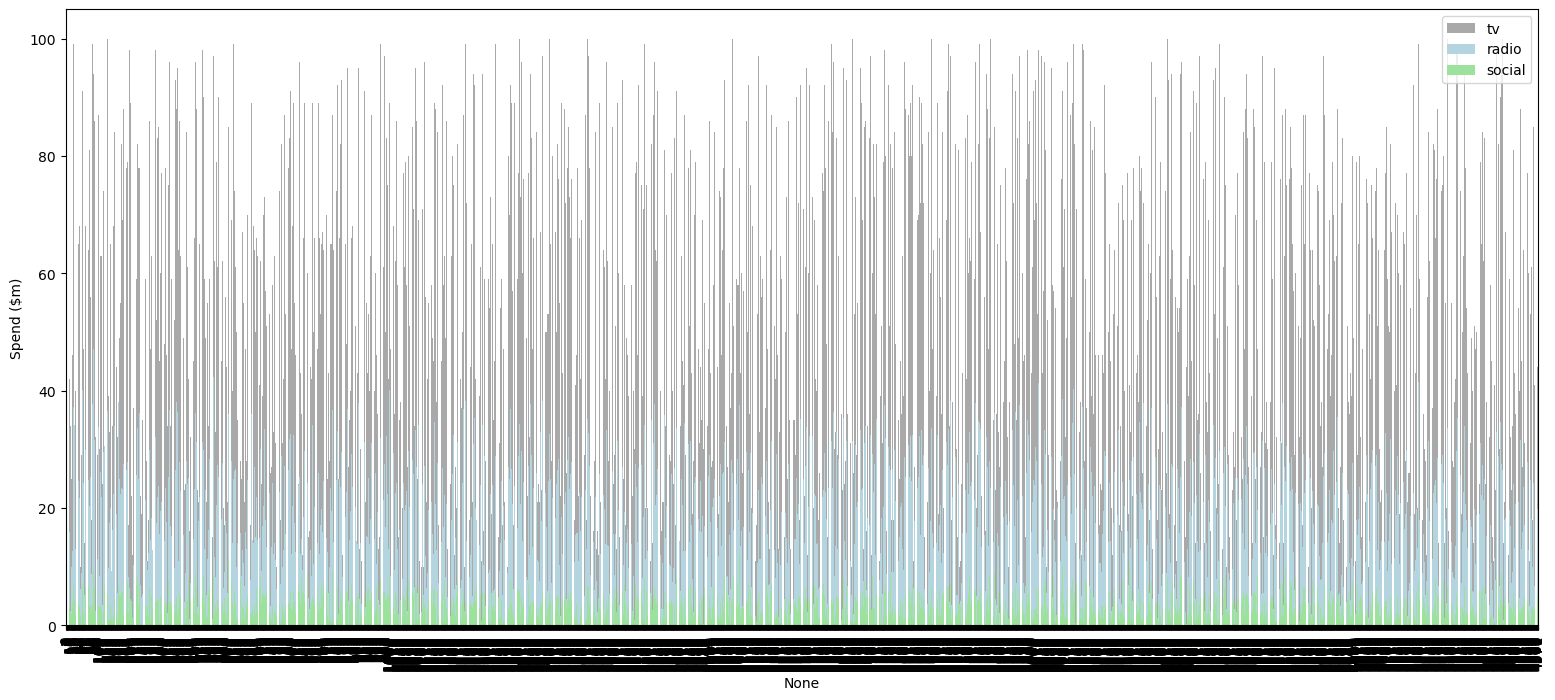

In [30]:
# Get every nth date for chart x-axis

# set the figure size
plt.figure(figsize=(19, 8))

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x= df.index, y="tv", data=df, color='darkgray', label = "tv")

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x= df.index, y="radio", data=df, color='lightblue', label = "radio")

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar3 = sns.barplot(x= df.index, y="social", data=df, color='lightgreen', label = "social")

plt.ylabel("Spend ($m)")
plt.xticks(rotation=90)
plt.show()

<Axes: >

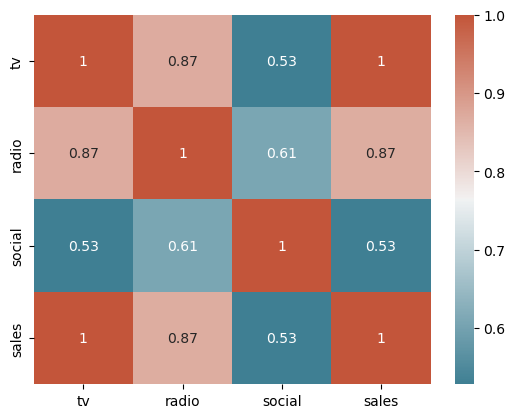

In [32]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr
            , xticklabels = corr.columns
            , yticklabels = corr.columns
            , annot = True
            , cmap = sns.diverging_palette(220, 20, as_cmap=True)
           )

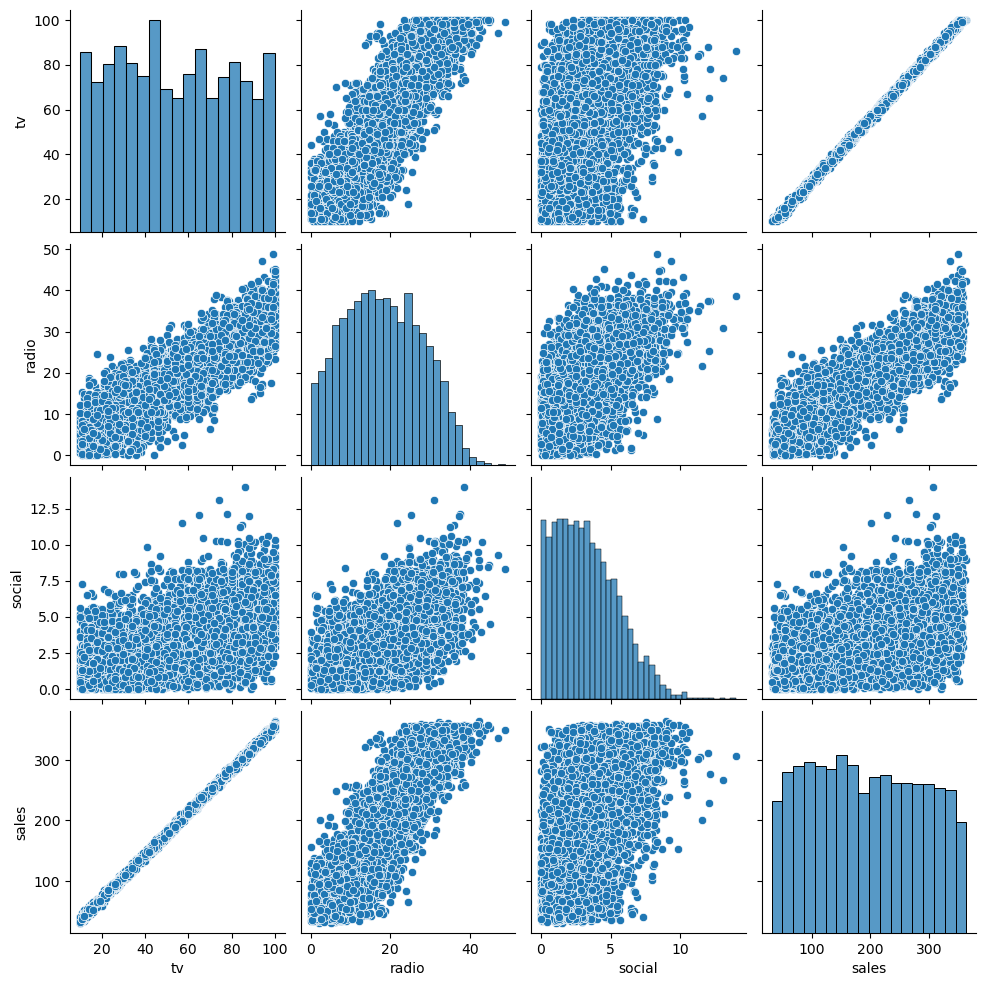

In [34]:
sns.pairplot(df)

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

In [42]:
y.isna().sum()

6

<Axes: >

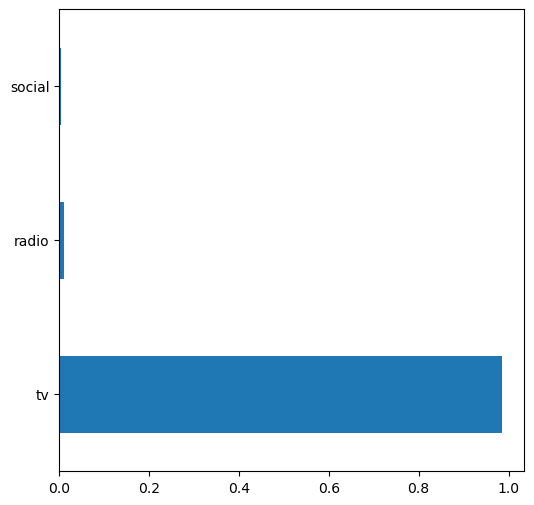

In [50]:
# Setting X and y variables
X = df.loc[:, ((df.columns != 'influencer_type') & (df.columns != 'sales'))]
y = df['sales']

# Building Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

pred = model.predict(X_test)

# Visualizing Feature Importance

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(6,6))

In [52]:
# Building the model

In [54]:
import statsmodels.formula.api as sm

In [58]:
model = sm.ols(formula="sales~tv+radio+social", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 6.751e+04
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:10:59   Log-Likelihood:                -18507.
No. Observations:                4572   AIC:                         3.702e+04
Df Residuals:                    4568   BIC:                         3.705e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7542      0.480      3.653      0.0

### Notes:
* Model explains 97.8% of the variance in sales (adjusted R-squared)
* As the F-statistic is significant, we know that variance is explained by some variables in the model
* TV accounts for most of the variance and every $1m spent generates $3.36m of sales
* Radio generate $.46m for every $1m spent 
* Social is not significant in the model
* Next will try splitting up the different types of social spend to see if any could be included

In [65]:
df['mega'] = np.where(df['influencer_type'] == 'Mega', df['social'], 0)
df['micro'] = np.where(df['influencer_type'] == 'Micro', df['social'], 0)
df['nano'] = np.where(df['influencer_type'] == 'Nano', df['social'], 0)
df['macro'] = np.where(df['influencer_type'] == 'Macro', df['social'], 0)

In [67]:
model = sm.ols(formula="sales~tv+radio+mega+micro+nano+macro", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 3.375e+04
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:16:19   Log-Likelihood:                -18506.
No. Observations:                4572   AIC:                         3.703e+04
Df Residuals:                    4565   BIC:                         3.707e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7588      0.480      3.662      0.0

In [71]:
model = sm.ols(formula="sales~tv+radio+mega+micro+nano+macro", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 3.375e+04
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:17:02   Log-Likelihood:                -18506.
No. Observations:                4572   AIC:                         3.703e+04
Df Residuals:                    4565   BIC:                         3.707e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7588      0.480      3.662      0.0